<a href="https://colab.research.google.com/github/SANAMAREEN/Project1/blob/master/DonorsChoose_org_Application_Screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Note book uses dataset from [DonorsChoose.org Application Screening](https://www.kaggle.com/c/donorschoose-application-screening/data) link


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('./train.csv')
data.head()

NameError: ignored

In [ ]:
resources = pd.read_csv('./resources.csv')
resources

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95
...,...,...,...,...
1541267,p031981,AmazonBasics 9 Volt Everyday Alkaline Batterie...,1,9.99
1541268,p031981,AmazonBasics AAA Performance Alkaline Batterie...,1,6.99
1541269,p031981,Black Electrical Tape (GIANT 3 PACK) Each Roll...,6,8.99
1541270,p031981,Flormoon DC Motor Mini Electric Motor 0.5-3V 1...,2,8.14


In [ ]:
filtered_data = data[['teacher_prefix', 'school_state', 'project_grade_category', 'project_subject_categories',
                      'project_subject_subcategories', 'project_essay_1', 'project_resource_summary',
                      'teacher_number_of_previously_posted_projects', 'project_is_approved']]

In [ ]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182080 entries, 0 to 182079
Data columns (total 9 columns):
teacher_prefix                                  182076 non-null object
school_state                                    182080 non-null object
project_grade_category                          182080 non-null object
project_subject_categories                      182080 non-null object
project_subject_subcategories                   182080 non-null object
project_essay_1                                 182080 non-null object
project_resource_summary                        182080 non-null object
teacher_number_of_previously_posted_projects    182080 non-null int64
project_is_approved                             182080 non-null int64
dtypes: int64(2), object(7)
memory usage: 12.5+ MB


In [ ]:
filtered_data_cat = pd.DataFrame()
for column in filtered_data.columns:
    if column in ['teacher_prefix', 'school_state', 'project_grade_category', 'project_subject_categories', 'project_subject_subcategories']:
        filtered_data_cat[column] = filtered_data[column].astype('category')
    else:
        filtered_data_cat[column] = filtered_data[column]


In [ ]:
filtered_data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182080 entries, 0 to 182079
Data columns (total 9 columns):
teacher_prefix                                  182076 non-null category
school_state                                    182080 non-null category
project_grade_category                          182080 non-null category
project_subject_categories                      182080 non-null category
project_subject_subcategories                   182080 non-null category
project_essay_1                                 182080 non-null object
project_resource_summary                        182080 non-null object
teacher_number_of_previously_posted_projects    182080 non-null int64
project_is_approved                             182080 non-null int64
dtypes: category(5), int64(2), object(2)
memory usage: 6.6+ MB


In [ ]:
for column in filtered_data_cat.columns:
    if column in ['teacher_prefix', 'school_state', 'project_grade_category', 'project_subject_categories', 'project_subject_subcategories']:
        filtered_data[column] = filtered_data_cat[column].cat.codes
    else:
        filtered_data[column] = filtered_data_cat[column]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
filtered_data.head()

,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,project_essay_1,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,3,33,3,24,321,Most of my kindergarten students come from low...,My students need 6 Ipod Nano's to create and d...,26,1
1,2,10,0,42,392,Our elementary school is a culturally rich sch...,My students need matching shirts to wear for d...,1,0
2,3,44,0,36,17,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,My students need the 3doodler. We are an SEM s...,5,1
3,1,27,0,8,293,My students are the greatest students but are ...,My students need balls and other activity equi...,16,0
4,1,4,1,8,293,My students are athletes and students who are ...,My students need a water filtration system for...,42,1


In [ ]:
data_dense_model = filtered_data[['teacher_prefix', 'school_state', 'project_grade_category', 'project_subject_categories', 'project_subject_subcategories']]
outputs = filtered_data['project_is_approved']
data_dense_model.head()

,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories
0,3,33,3,24,321
1,2,10,0,42,392
2,3,44,0,36,17
3,1,27,0,8,293
4,1,4,1,8,293


In [ ]:
project_essay_1_data = filtered_data['project_essay_1']
project_essay_1_data.head()

0    Most of my kindergarten students come from low...
1    Our elementary school is a culturally rich sch...
2    Hello;\r\nMy name is Mrs. Brotherton. I teach ...
3    My students are the greatest students but are ...
4    My students are athletes and students who are ...
Name: project_essay_1, dtype: object

In [ ]:
project_resource_summary_data = filtered_data['project_resource_summary']
project_resource_summary_data.head()

0    My students need 6 Ipod Nano's to create and d...
1    My students need matching shirts to wear for d...
2    My students need the 3doodler. We are an SEM s...
3    My students need balls and other activity equi...
4    My students need a water filtration system for...
Name: project_resource_summary, dtype: object

In [ ]:
tokenizer_project_essay_1 = Tokenizer()
tokenizer_project_essay_1.fit_on_texts(project_essay_1_data.values)
project_essay_1_token = tokenizer_project_essay_1.texts_to_sequences(project_essay_1_data.values)
project_essay_1_token = sequence.pad_sequences(project_essay_1_token, maxlen=200)

In [ ]:
project_essay_1_token.shape

(182080, 200)

In [ ]:
tokenizer_project_resource_summary = Tokenizer()
tokenizer_project_resource_summary.fit_on_texts(project_resource_summary_data.values)
project_resource_summary_token = tokenizer_project_resource_summary.texts_to_sequences(project_resource_summary_data.values)
project_resource_summary_token = sequence.pad_sequences(project_essay_1_token, maxlen=200)

In [ ]:
project_resource_summary_token.shape

(182080, 200)

# Dense Section

In [ ]:
dense_input = Input(shape=(data_dense_model.shape[1],), dtype='int32', name='dense_input')
x = layers.Dense(64, activation='relu')(dense_input)
x = layers.Dense(64, activation='relu')(x)
output_dense_only = layers.Dense(1, activation='sigmoid')(x)
last_dense = layers.Flatten()(x)

# Conv 1D Section for Essay 1

In [ ]:
project_essay_1_input = Input(shape=(None,), dtype='int32', name='project_essay_1')
x = layers.Embedding(len(tokenizer_project_essay_1.word_index.keys()) + 1, 32, input_length=200)(project_essay_1_input)
x = layers.Conv1D(128, 5, activation='relu')(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Dropout(0.1)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Dropout(0.1)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
last_project_essay_1 = layers.GlobalMaxPooling1D()(x)

# Conv 1D Section For resource Summary

In [ ]:
project_resource_summary_input = Input(shape=(None,), dtype='int32', name='project_resource_summary')
x = layers.Embedding(len(tokenizer_project_resource_summary.word_index.keys()) + 1, 32, input_length=200)(project_resource_summary_input)
x = layers.Conv1D(128, 5, activation='relu')(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Dropout(0.1)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Dropout(0.1)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
last_embedded_project_resource_summary = layers.GlobalMaxPooling1D()(x)

# Combining the Sections

In [ ]:
concatenated = layers.concatenate([last_dense, last_project_essay_1, last_embedded_project_resource_summary], axis=-1)
x = layers.Dense(200, activation='relu')(concatenated)
x = layers.Dense(20, activation='relu')(x)
output_combined = layers.Dense(1, activation='sigmoid')(x)

# Dense Only Model

In [ ]:
model_dense_only = Model(dense_input, output_dense_only)
model_dense_only.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history_dense_only = model_dense_only.fit({'dense_input': data_dense_model.values}, outputs, epochs=10, batch_size=128, validation_split=0.2)

In [ ]:
loss = history_dense_only.history['loss']
val_loss = history_dense_only.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Combined Model

In [ ]:
model_combined = Model({'project_essay_1': project_essay_1_input, 'project_resource_summary': project_resource_summary_input,
                        'dense_input': dense_input}, output_dense_only)
model_combined.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history_combined = model_combined.fit({'project_essay_1': project_essay_1_token, 'project_resource_summary': project_resource_summary_token, 'dense_input': data_dense_model.values}, outputs, epochs=10, batch_size=128, validation_split=0.2)

Train on 145664 samples, validate on 36416 samples
Epoch 1/10
145664/145664 [==============================] - 2s 14us/sample - loss: 1.1459 - acc: 0.7666 - val_loss: 0.4364 - val_acc: 0.8481
Epoch 2/10
145664/145664 [==============================] - 2s 11us/sample - loss: 0.5568 - acc: 0.8247 - val_loss: 0.4781 - val_acc: 0.8481
Epoch 3/10
145664/145664 [==============================] - 2s 11us/sample - loss: 0.4568 - acc: 0.8449 - val_loss: 0.4588 - val_acc: 0.8481
Epoch 4/10
145664/145664 [==============================] - 2s 12us/sample - loss: 0.4400 - acc: 0.8476 - val_loss: 0.4282 - val_acc: 0.8481
Epoch 5/10
145664/145664 [==============================] - 2s 11us/sample - loss: 0.4339 - acc: 0.8476 - val_loss: 0.4375 - val_acc: 0.8481
Epoch 6/10
145664/145664 [==============================] - 2s 11us/sample - loss: 0.4317 - acc: 0.8476 - val_loss: 0.4267 - val_acc: 0.8481
Epoch 7/10
145664/145664 [==============================] - 2s 12us/sample - loss: 0.4303 - acc: 0.8476

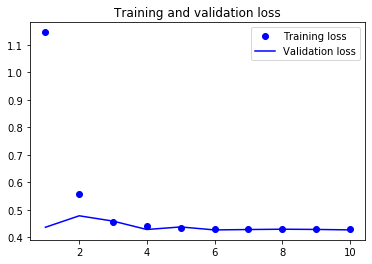

In [ ]:
loss = history_combined.history['loss']
val_loss = history_combined.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()